<a href="https://colab.research.google.com/github/Murad-pitafi/Machine-Learning/blob/main/Support_Vector_Machines_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title Lab Activity Part ( Task 3)
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/static/public/17/data.csv")
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
data.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [7]:
data.nunique()

ID                    569
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

Ma'am You must have know this too , the datasets available in UCI machine leanring are already preprocessed , There's no need to do much effort in preprocessing phase  

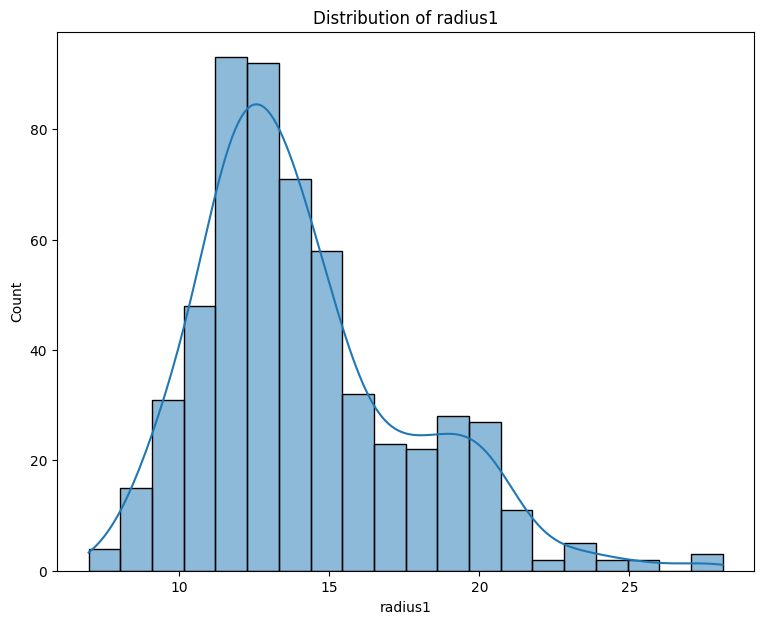

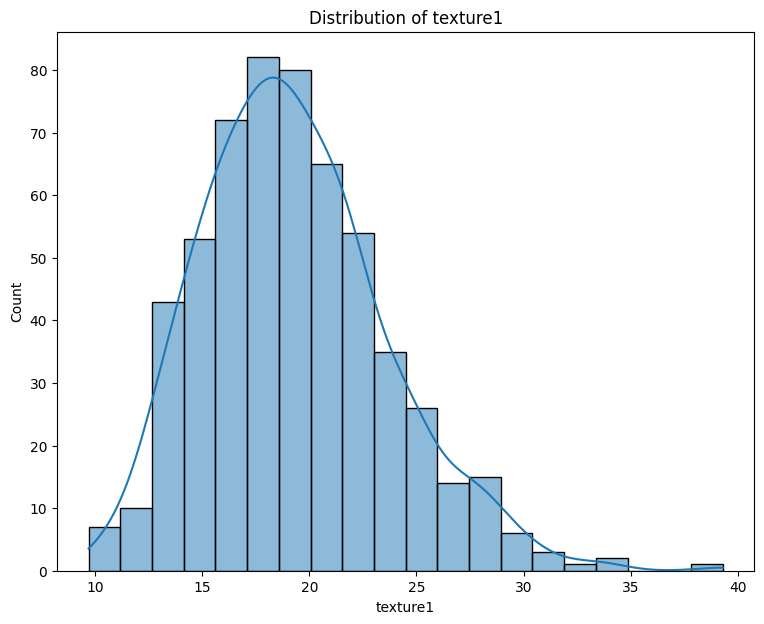

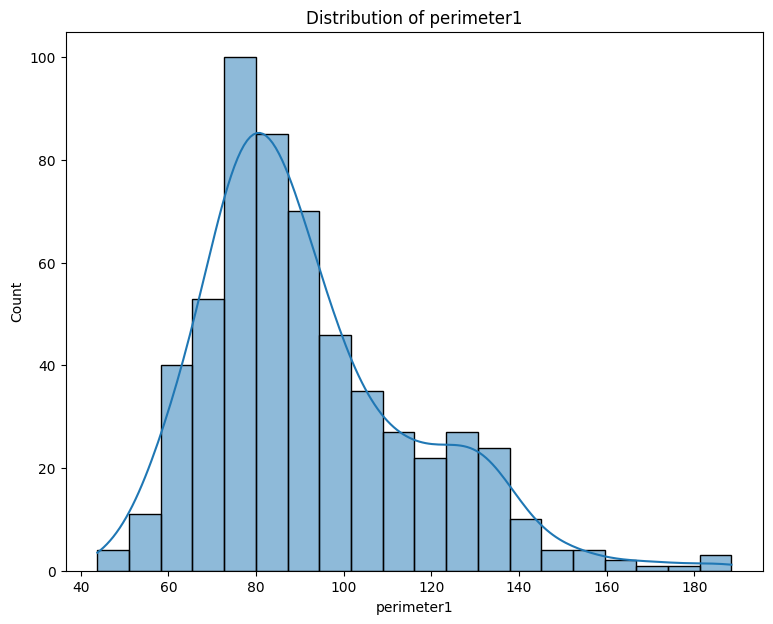

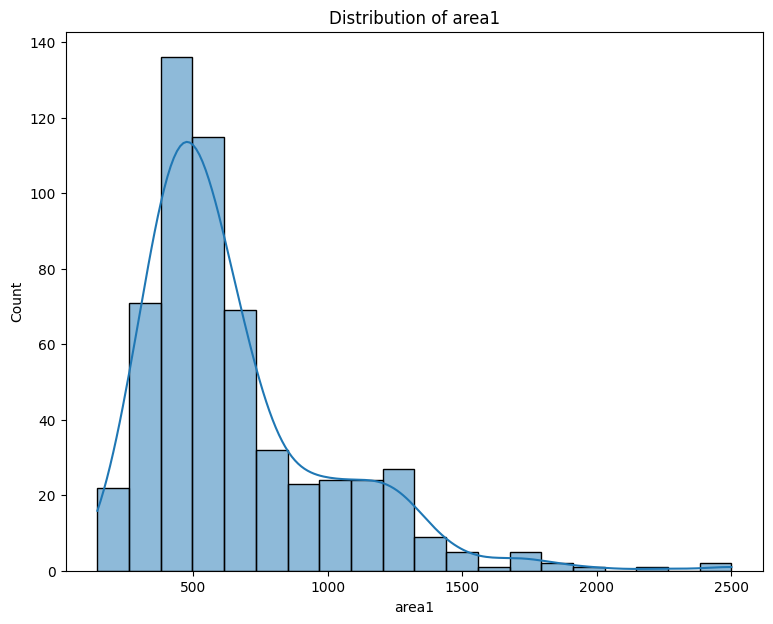

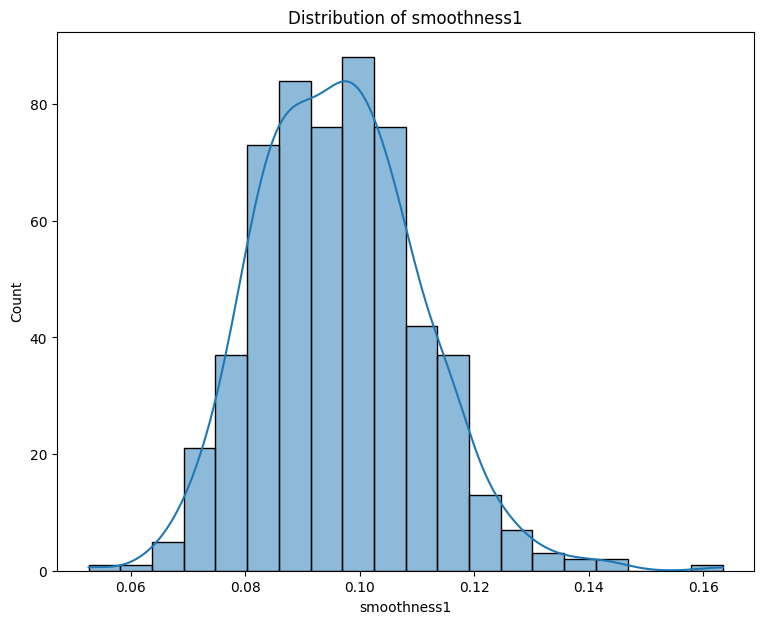

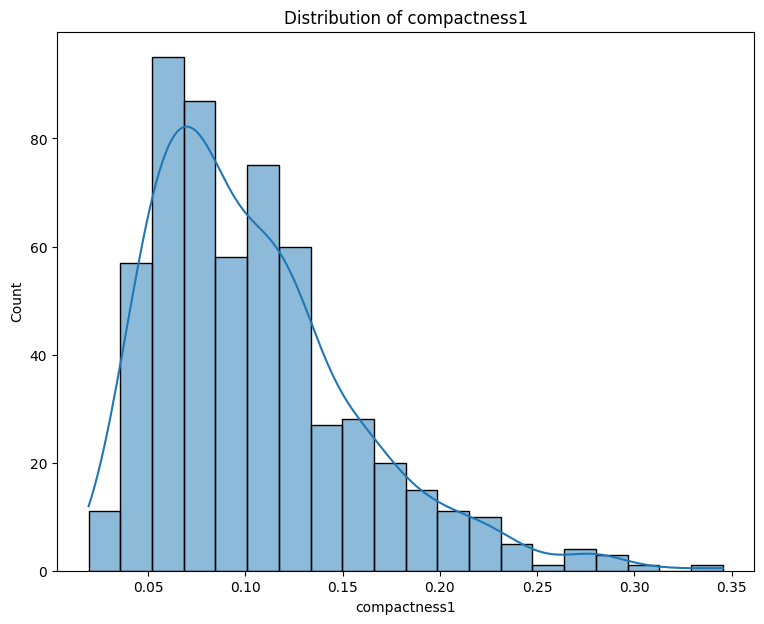

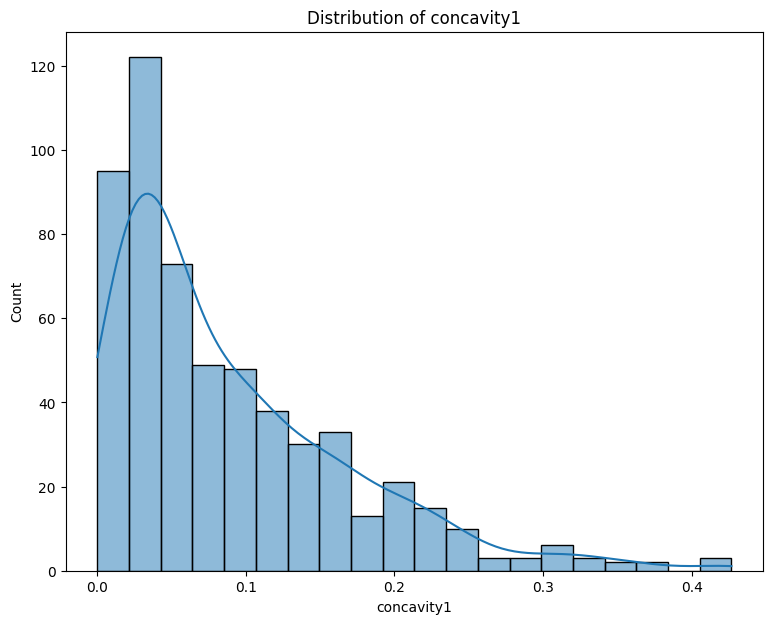

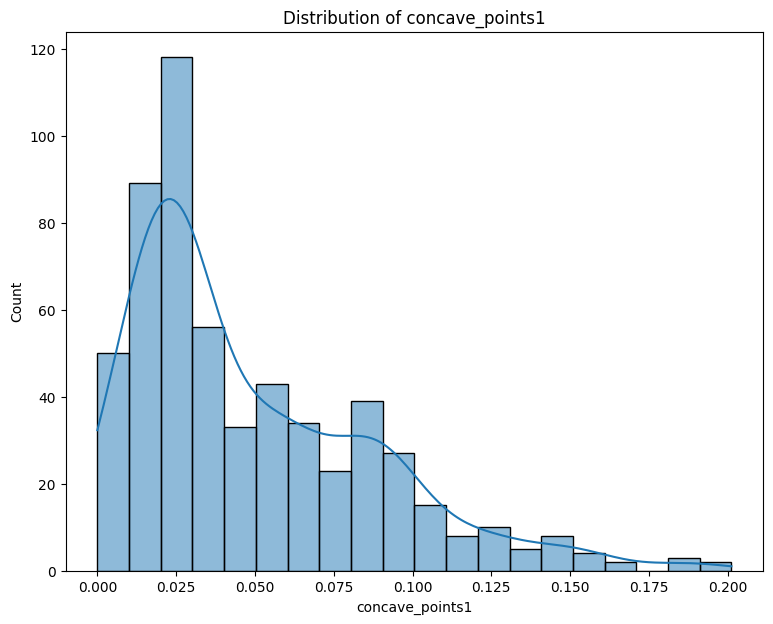

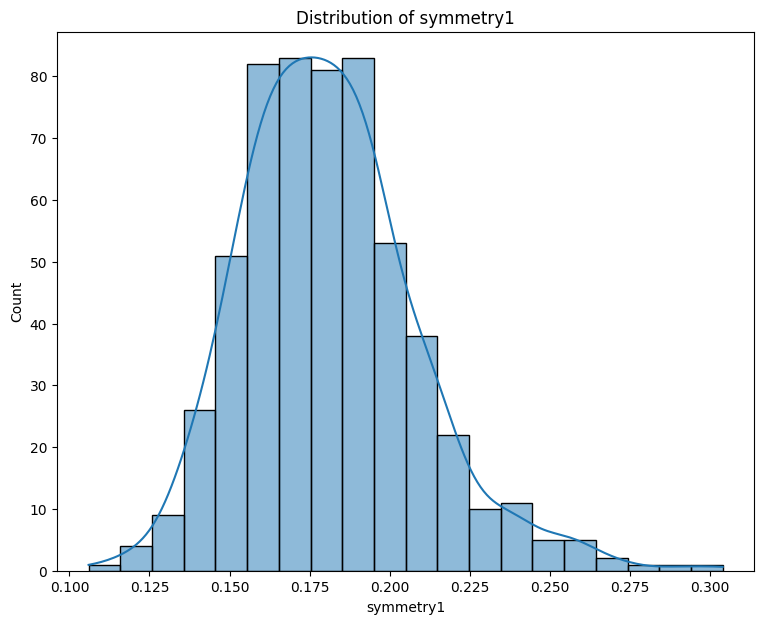

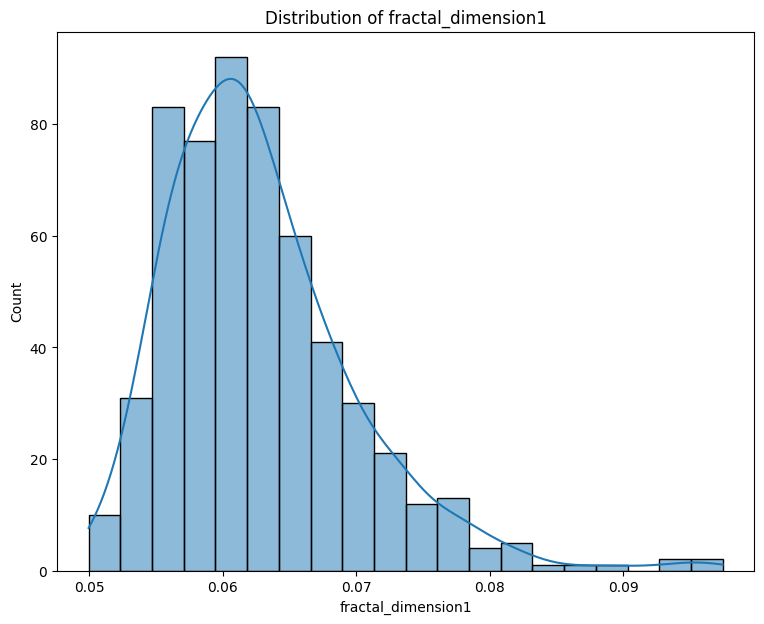

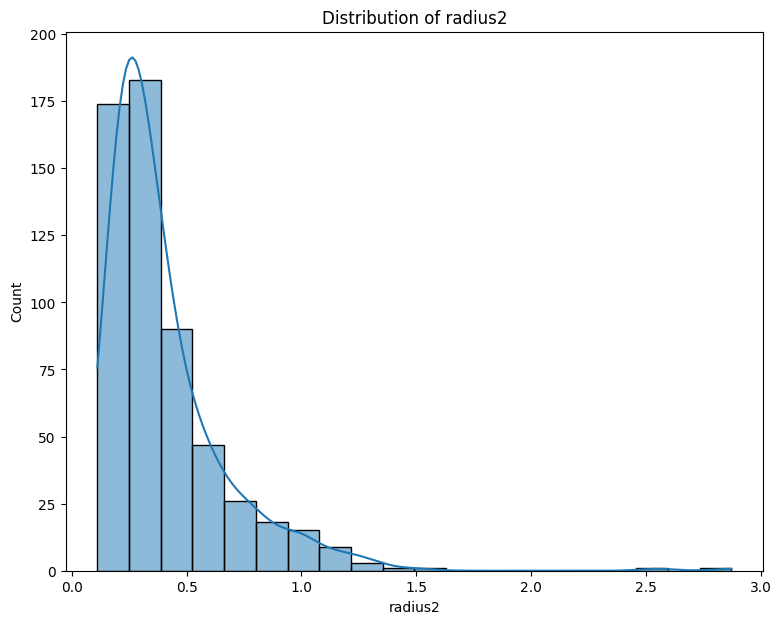

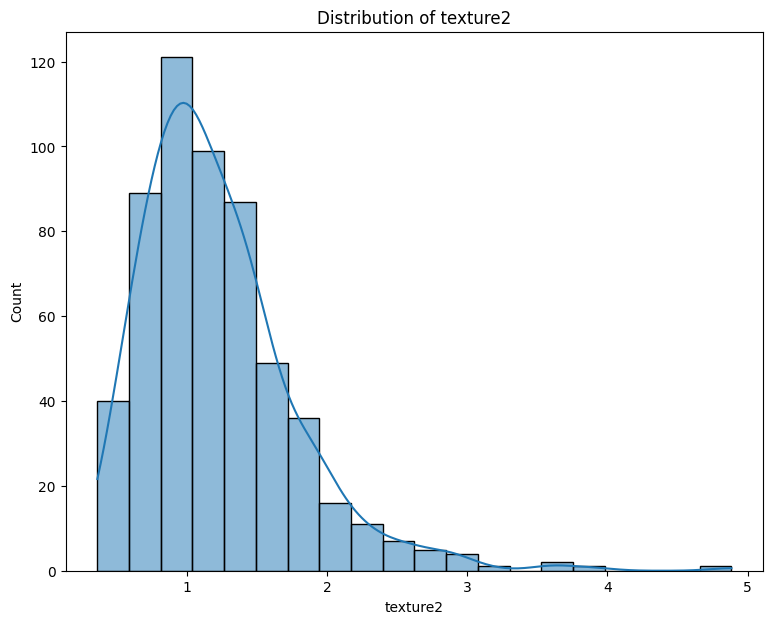

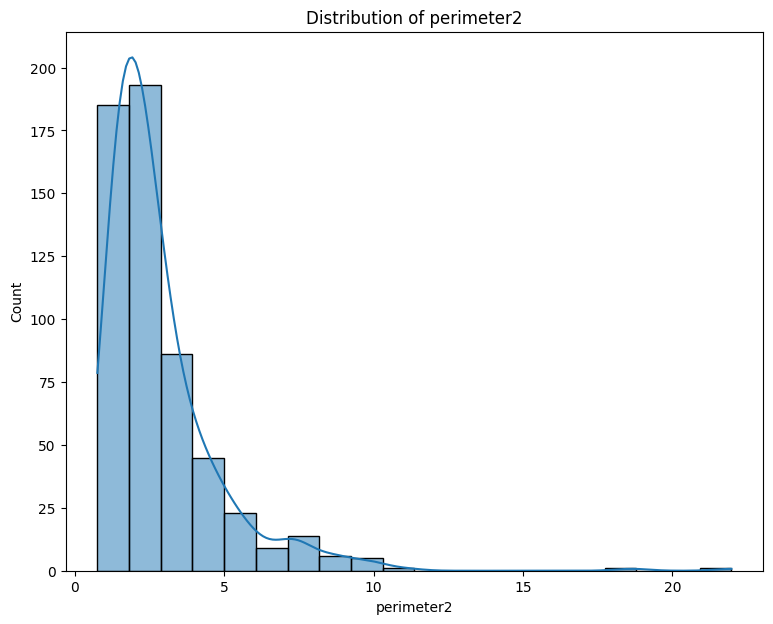

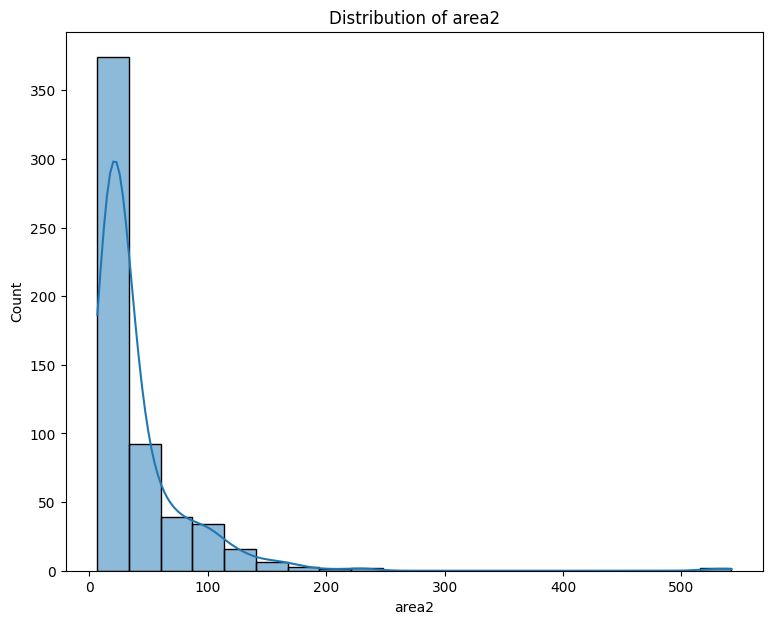

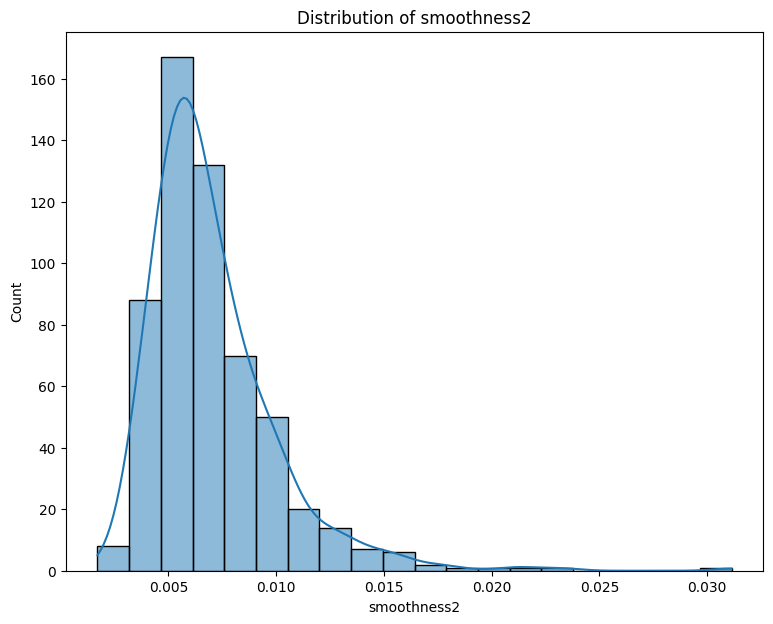

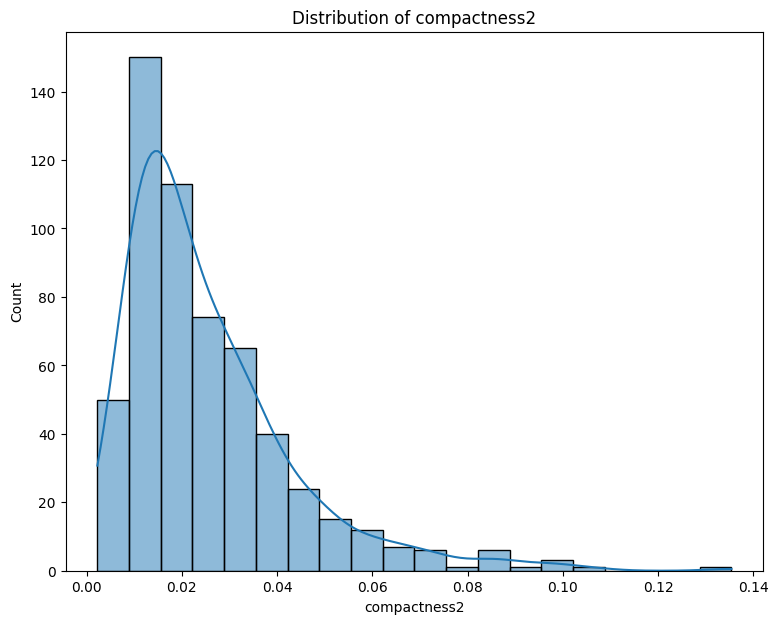

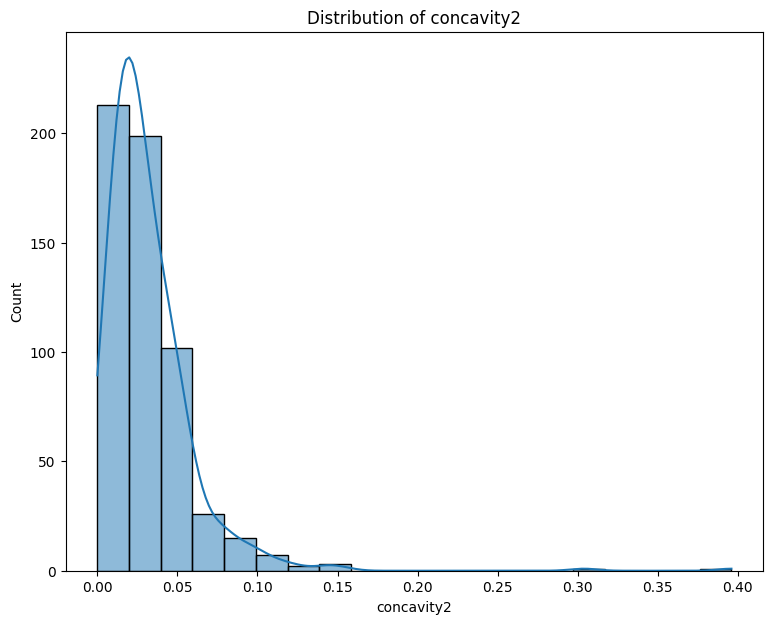

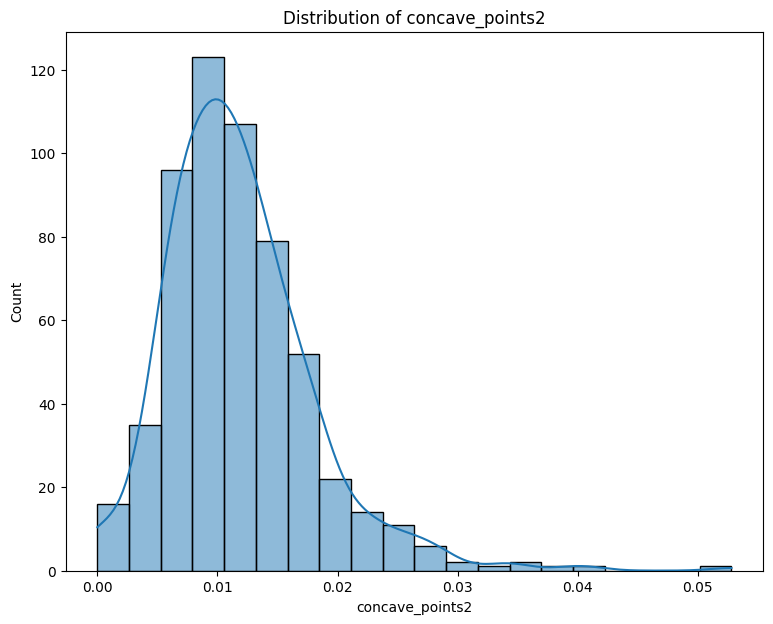

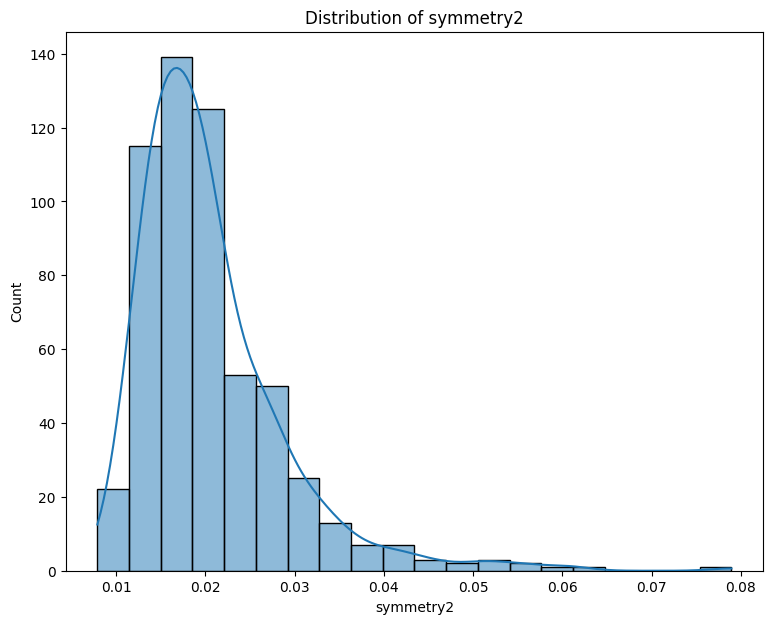

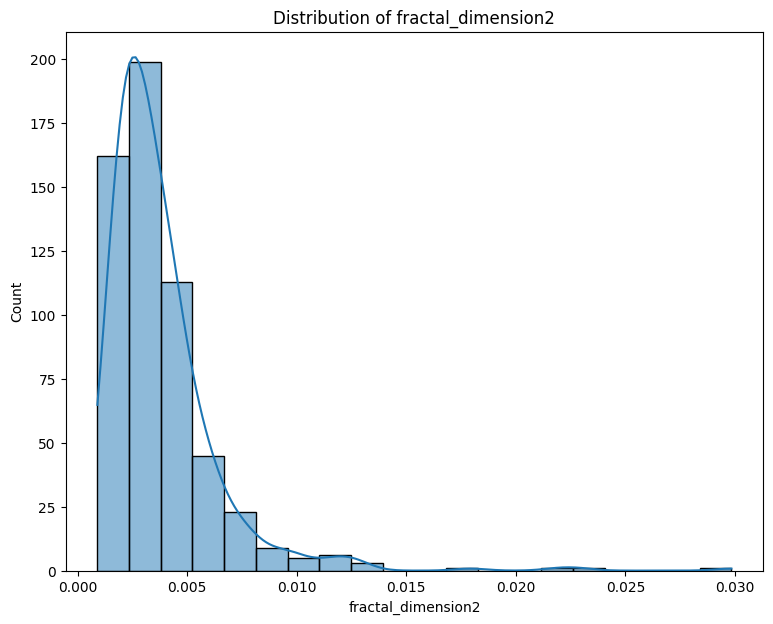

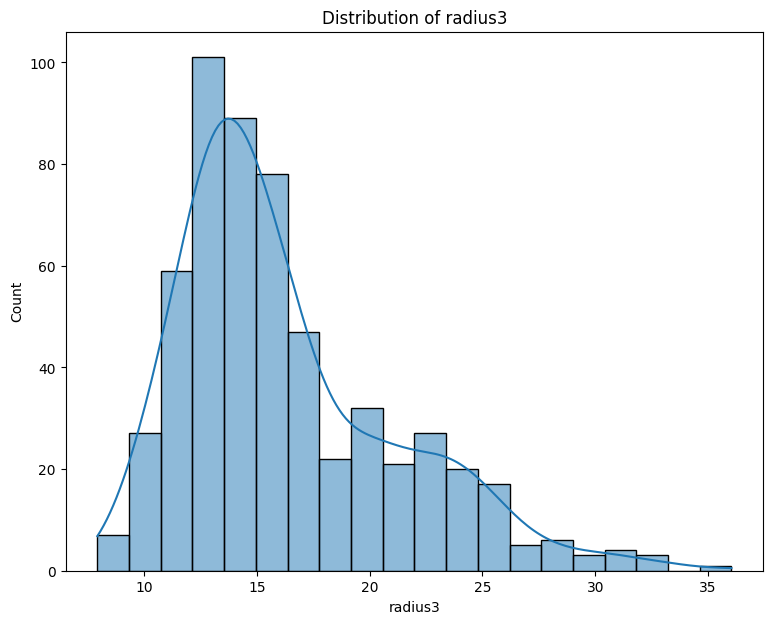

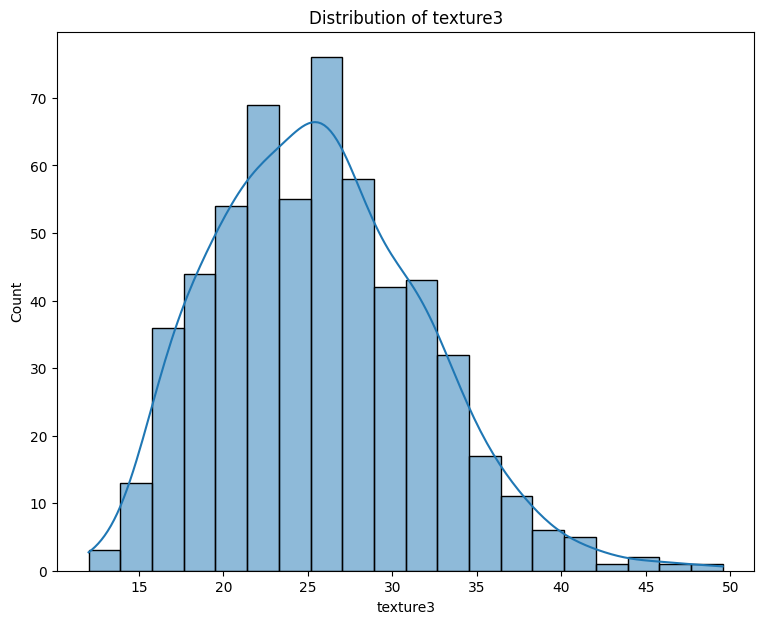

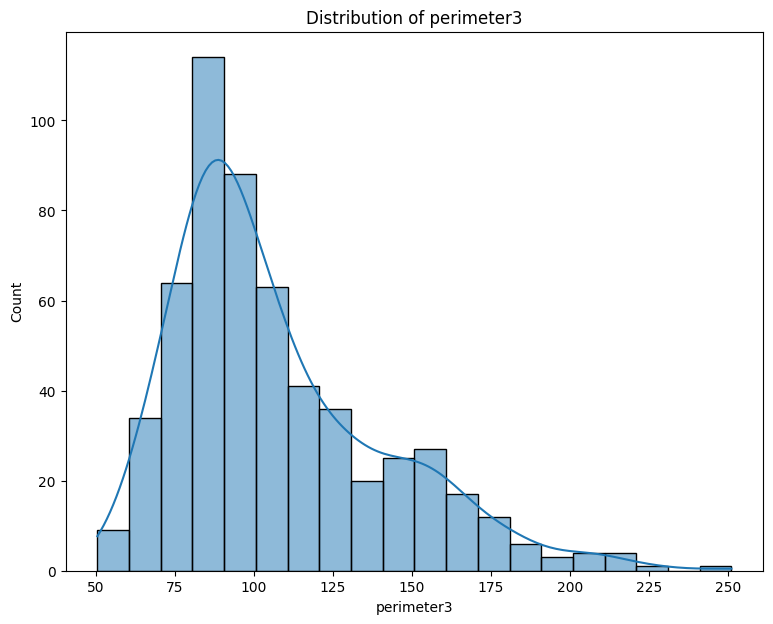

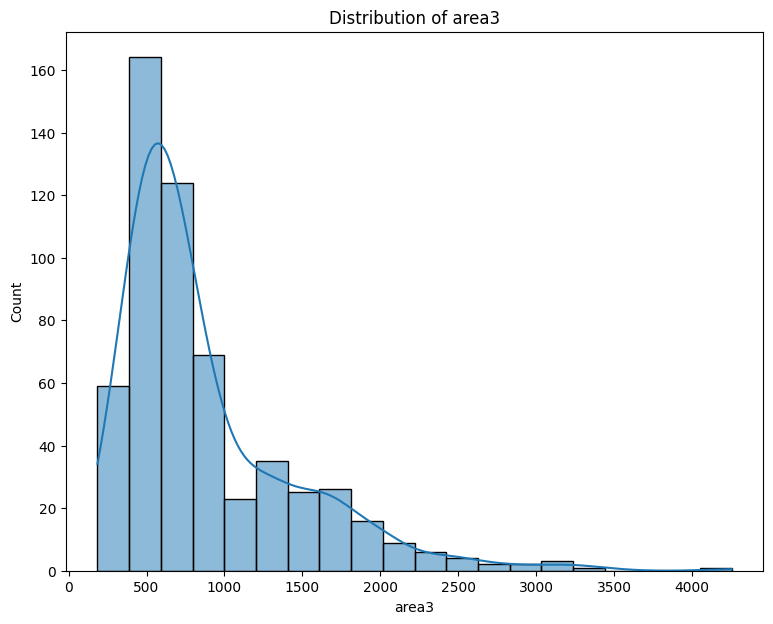

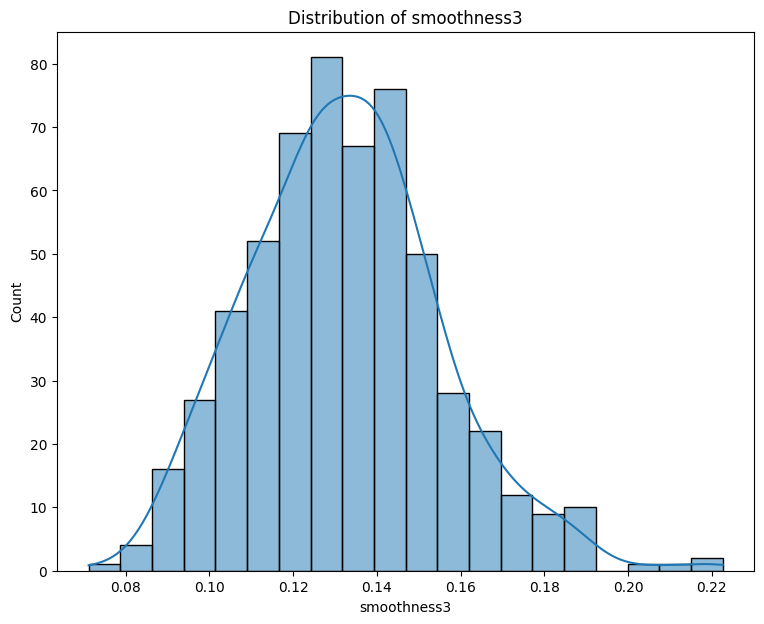

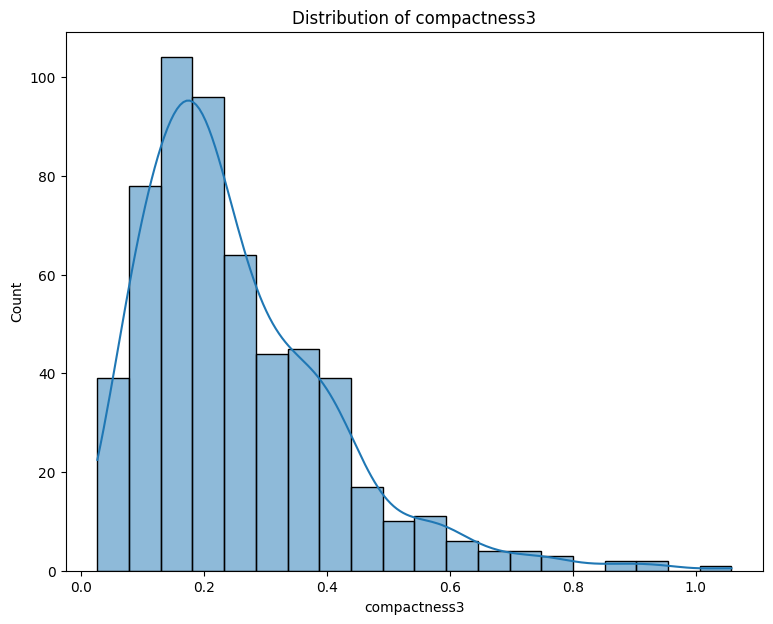

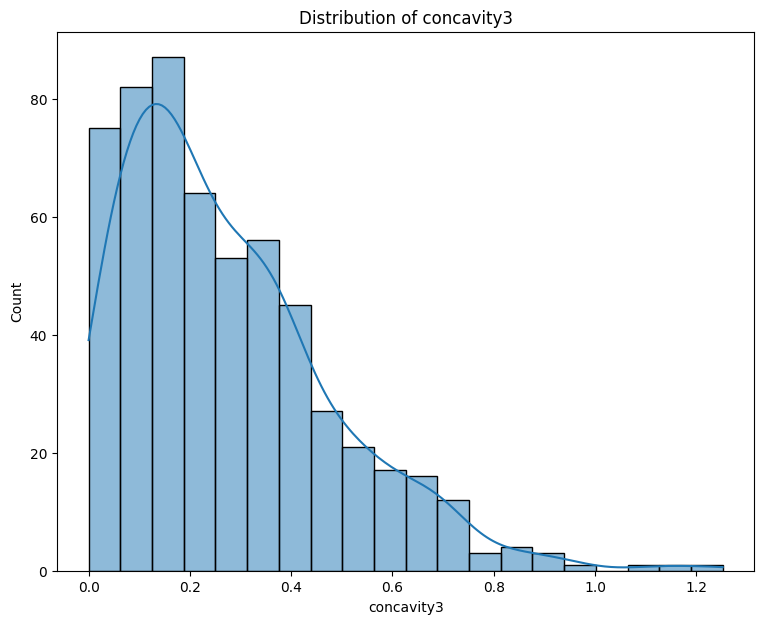

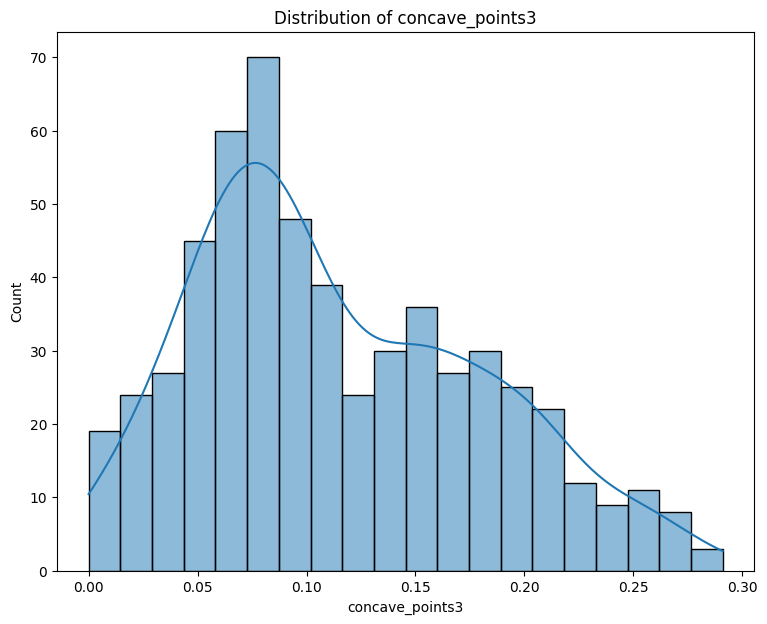

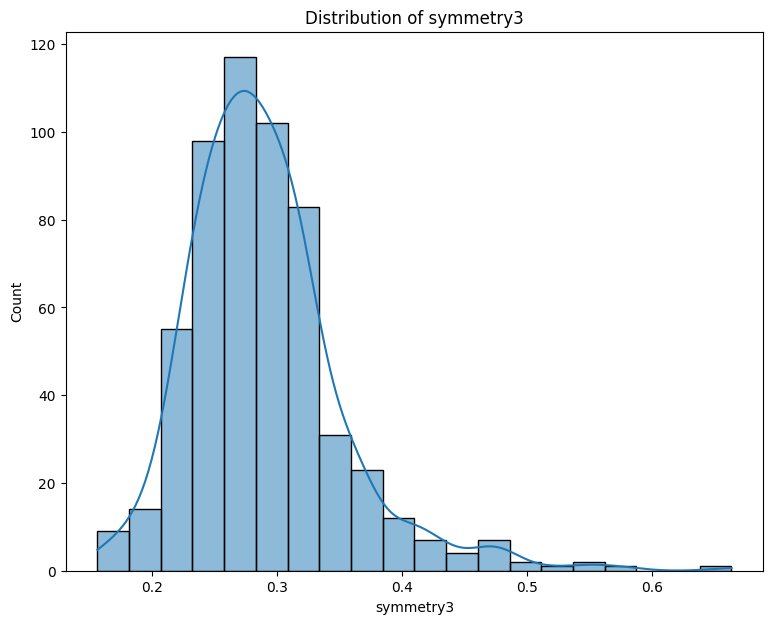

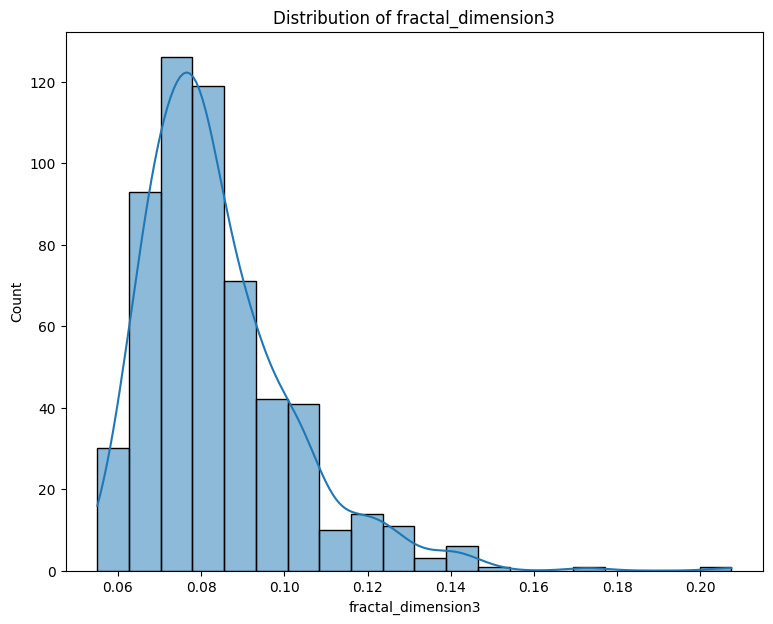

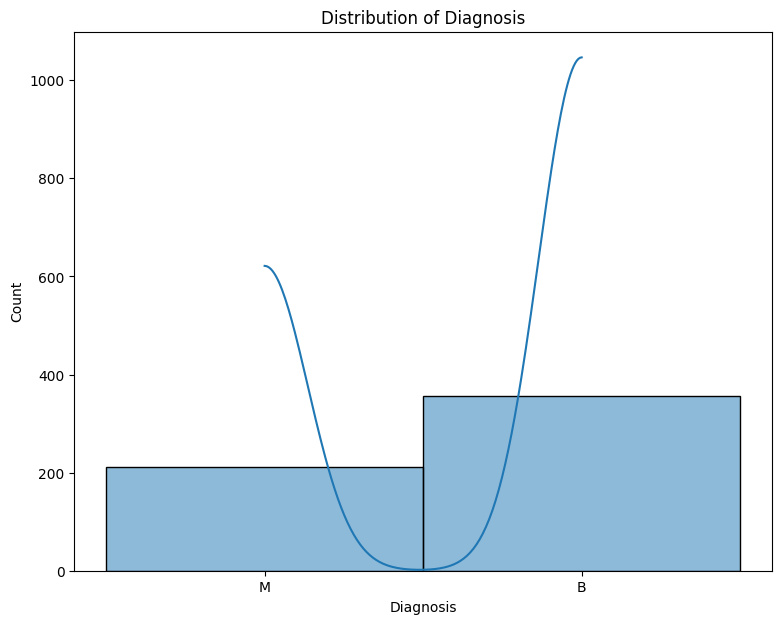

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = data.drop(['ID'], axis = 1)
for i in plot.columns:
  plt.figure(figsize = (9,7))
  plt.title(f'Distribution of {i}')
  sns.histplot(x = i, data = data, bins = 20, kde = True)
  plt.show()
# g = sns.PairGrid(data)
# g.map_diag(sns.histplot)
# plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x = data.drop(['ID', 'Diagnosis'], axis = 1)
y = data['Diagnosis']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 41, test_size = 0.3)


In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(xtrain, ytrain)
    print(f"Kernel: {kernel}, Accuracy: {svc.score(xtest, ytest):.2f}")


Kernel: linear, Accuracy: 0.98
Kernel: poly, Accuracy: 0.92
Kernel: rbf, Accuracy: 0.92
Kernel: sigmoid, Accuracy: 0.43


In [ ]:
## now for hyperparameter
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

best_param = GridSearchCV(SVC(), parameters)

best_param.fit(xtrain, ytrain)

print(f"Best parameters: {best_param.best_params_}")
print(f"Accuracy: {best_param.score(xtest, ytest):.2f}")
